# DOTA 2 DATASET

## Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import os
import glob
import pandas as pd
import nltk
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Import Dataset

In [2]:
dfx = pd.read_csv ('dota2_chat_messages.csv')
print (dfx)

           match        time  slot            text
0              0  1005.12122     9       ладно гг 
1              0  1005.85442     9             изи
2              0  1008.65372     9              од
3              0  1010.51992     9          ебаный
4              0  1013.91912     9  мусор на войде
...          ...         ...   ...             ...
21659443  999999   584.41162     2               ?
21659444  999999   974.04976     0      sec please
21659445  999999  1708.53706     5               ?
21659446  999999  2674.38856     3        ggwp lol
21659447  999999  2831.95866     9              ez

[21659448 rows x 4 columns]


## Data Pre-processing

### Dropping unnecessary columns

In [3]:
df1 = dfx
df1 = df1.drop(columns=['match','slot','time'])
df1

,text
0,ладно гг
1,изи
2,од
3,ебаный
4,мусор на войде
...,...
21659443,?
21659444,sec please
21659445,?
21659446,ggwp lol


### Removing non-English rows

In [4]:
df1.replace({r'[^\x00-\x7F]+':np.nan}, regex=True, inplace=True)
df1

,text
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
21659443,?
21659444,sec please
21659445,?
21659446,ggwp lol


### Dropping Null rows

In [5]:
df1 = df1.dropna()
df2=df1
df2

,text
8,100%
9,twitch.tv/rage_channel
10,https://www.twitch.tv/rage_channel
18,https://www.twitch.tv/rage_channel
19,https://www.twitch.tv/rage_channel
...,...
21659443,?
21659444,sec please
21659445,?
21659446,ggwp lol


### Dropping non ASCII rows

In [6]:
df2 = df2[~df2['text'].str.isnumeric()]
df2 = df2[~df2['text'].str.isdigit()]

### Removing URL

In [7]:
df2 = df2[~df2['text'].str.contains('\d')]
df2 = df2[~df2.text.str.contains("twitch")]
df2

,text
23,)))
24,carry
25,yes dog
26,lul
27,HAHAH
...,...
21659443,?
21659444,sec please
21659445,?
21659446,ggwp lol


### Reseting Index

In [8]:
df3 = df2.reset_index(drop=True)
df3

,text
0,)))
1,carry
2,yes dog
3,lul
4,HAHAH
...,...
13365821,?
13365822,sec please
13365823,?
13365824,ggwp lol


## Exploratory Data Analysis

### Wordcloud

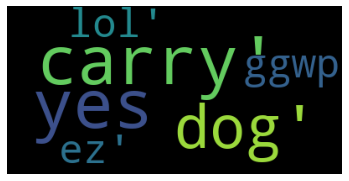

In [9]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

text = df3['text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Most frequent 100 words

In [10]:
count = pd.Series(' '.join(df3.text).split()).value_counts()[:100]
count

gg      891498
?       453902
ez      413832
lol     292857
u       267627
         ...  
WP       37379
pa       37320
come     36777
gege     36482
g        36030
Length: 100, dtype: int64

### Most Frequent words top 5

In [11]:
count1 = pd.Series(' '.join(df3.text).split()).value_counts()[:5]
count1

gg     891498
?      453902
ez     413832
lol    292857
u      267627
dtype: int64

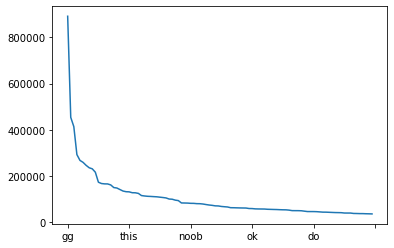

In [12]:
count.plot()
plt.show()

## VADER Classifier

In [13]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

### Scores for different terms

In [14]:
sentiment_analyzer_scores("gg")

gg-------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}


In [15]:
sentiment_analyzer_scores("?")

?--------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
sentiment_analyzer_scores("GGWP")

GGWP------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
